In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

# 4.1  "Create 3 clusters as below.



1. Sensitive Area's



2. Moderate Area's



3. Peaceful Area's"

In [2]:
df=pd.read_csv(r'C:\Users\arunk\OneDrive\Documents\Phase 1\data\01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [3]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [5]:
# There are 9017 rows and 33columns.

In [6]:
df.isna().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [7]:
# No null values present

In [8]:
df.duplicated().sum()

0

In [9]:
# No duplicated values present

In [10]:
# From phase 3 we know that there are some rows which have 'TOTAL' & "DELHI UT TOTAL" in the columns DISTRICT, so we will remove them

In [11]:
df.drop(df[df['DISTRICT'] == 'TOTAL'].index, inplace=True)
df.drop(df[df['DISTRICT'] == 'DELHI UT TOTAL'].index, inplace=True)


In [12]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
9011,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,5558
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787


In [13]:
# fix the index values.

In [14]:
df.reset_index(inplace = True)

In [15]:
df

,index,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,30,1131,16,149,34,175,0,181,1518,4154
1,1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,...,69,1543,7,118,24,154,0,270,754,4125
2,2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,...,38,2088,14,112,83,186,0,404,1262,5818
3,3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,...,23,795,17,126,38,57,0,233,1181,3140
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,9010,DELHI UT,STF,2012,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8593,9011,DELHI UT,WEST,2012,52,37,10,79,0,79,...,18,227,18,53,6,327,0,292,1144,5558
8594,9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
8595,9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,...,1,186,0,2,0,1,0,44,392,787


# Merging according to the states.

In [16]:
# group the dataset according to the states

df1 = df.groupby(['STATE/UT']).sum()
df1

,index,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,118094,48161,160,65,21,109,0,109,94,77,...,98,1105,6,214,43,121,0,42,4443,9102
ANDHRA PRADESH,1497964,718391,31756,22420,1763,13479,2,13477,21239,14936,...,11968,546565,6215,51999,36131,119007,17,138435,482252,2018981
ARUNACHAL PRADESH,782383,367239,841,417,36,500,0,500,857,558,...,250,5157,2,784,18,167,0,745,7396,27652
ASSAM,1477835,702334,15432,5662,718,16178,5,16173,27939,22920,...,7918,69183,1276,13620,112,39388,8,30205,181354,597764
BIHAR,2183060,1059432,41245,40919,3672,13124,2,13122,37220,19389,...,8509,189266,13548,7576,226,25680,440,44442,538591,1346293
CHANDIGARH,57125,24078,243,301,79,281,0,281,640,534,...,62,816,42,314,143,807,0,98,11605,40807
CHHATTISGARH,1110591,509720,12060,7910,348,11838,0,11838,3345,2630,...,3147,85026,1142,19165,1725,9573,5,25432,245855,561027
D & N HAVELI,57149,24078,108,31,3,56,0,56,141,94,...,55,318,1,50,4,38,0,148,1859,4651
DAMAN & DIU,114358,48156,68,38,2,20,0,20,31,15,...,34,190,3,15,2,35,0,311,661,2948


In [17]:
df1 = df1.drop(['index','YEAR'], axis=1)


df1= df1.reset_index()

In [18]:
df1.columns

Index(['STATE/UT', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [19]:
# we need total sum of crimes, so we willl make a new column for that.

In [20]:
tc=[ 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']


In [21]:
df1['Total Crimes'] = df1[tc].sum(axis=1)

In [22]:
df1

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes
0,A & N ISLANDS,160,65,21,109,0,109,94,77,17,...,1105,6,214,43,121,0,42,4443,9102,19531
1,ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,...,546565,6215,51999,36131,119007,17,138435,482252,2018981,4359870
2,ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,...,5157,2,784,18,167,0,745,7396,27652,61839
3,ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,...,69183,1276,13620,112,39388,8,30205,181354,597764,1325120
4,BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,...,189266,13548,7576,226,25680,440,44442,538591,1346293,2896302
5,CHANDIGARH,243,301,79,281,0,281,640,534,106,...,816,42,314,143,807,0,98,11605,40807,101009
6,CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,...,85026,1142,19165,1725,9573,5,25432,245855,561027,1200110
7,D & N HAVELI,108,31,3,56,0,56,141,94,47,...,318,1,50,4,38,0,148,1859,4651,10272
8,DAMAN & DIU,68,38,2,20,0,20,31,15,16,...,190,3,15,2,35,0,311,661,2948,6511
9,DELHI UT,6205,5277,883,6424,0,6424,25083,15650,9433,...,22210,1582,7534,1687,15211,1,7503,237457,633174,1529401


In [23]:
df1.shape

(35, 32)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 32 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             35 non-null     object
 1   MURDER                                               35 non-null     int64 
 2   ATTEMPT TO MURDER                                    35 non-null     int64 
 3   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            35 non-null     int64 
 4   RAPE                                                 35 non-null     int64 
 5   CUSTODIAL RAPE                                       35 non-null     int64 
 6   OTHER RAPE                                           35 non-null     int64 
 7   KIDNAPPING & ABDUCTION                               35 non-null     int64 
 8   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS          35 non-null     int64 
 9   K

In [25]:
df1.duplicated().sum()

0

In [27]:
x=df1.drop(columns='STATE/UT')

In [39]:
# Standardise the data

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
xscaled=scalar.fit_transform(x)

In [40]:
from sklearn.decomposition import PCA
pca = PCA(2)
x1 = pca.fit_transform(x)

In [41]:
from sklearn.cluster import KMeans


In [42]:
model = KMeans(n_clusters=3, random_state=65)

y = model.fit_predict(x1) 

In [43]:
y

array([1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0])

In [44]:
from sklearn.metrics import silhouette_score


In [45]:
silhouette_score(x,y)


0.6991453947055726

In [46]:
df1['sensitivity'] = model.labels_

In [47]:
df1

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes,sensitivity
0,A & N ISLANDS,160,65,21,109,0,109,94,77,17,...,6,214,43,121,0,42,4443,9102,19531,1
1,ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,...,6215,51999,36131,119007,17,138435,482252,2018981,4359870,2
2,ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,...,2,784,18,167,0,745,7396,27652,61839,1
3,ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,...,1276,13620,112,39388,8,30205,181354,597764,1325120,1
4,BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,...,13548,7576,226,25680,440,44442,538591,1346293,2896302,0
5,CHANDIGARH,243,301,79,281,0,281,640,534,106,...,42,314,143,807,0,98,11605,40807,101009,1
6,CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,...,1142,19165,1725,9573,5,25432,245855,561027,1200110,1
7,D & N HAVELI,108,31,3,56,0,56,141,94,47,...,1,50,4,38,0,148,1859,4651,10272,1
8,DAMAN & DIU,68,38,2,20,0,20,31,15,16,...,3,15,2,35,0,311,661,2948,6511,1
9,DELHI UT,6205,5277,883,6424,0,6424,25083,15650,9433,...,1582,7534,1687,15211,1,7503,237457,633174,1529401,1


In [50]:
moderate_states = df1[df1['sensitivity'] == 0]
peaceful_states = df1[df1['sensitivity'] == 1]
sensitive_states =df1[df1['sensitivity'] == 2]

In [51]:
peaceful_states

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes,sensitivity
0,A & N ISLANDS,160,65,21,109,0,109,94,77,17,...,6,214,43,121,0,42,4443,9102,19531,1
2,ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,...,2,784,18,167,0,745,7396,27652,61839,1
3,ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,...,1276,13620,112,39388,8,30205,181354,597764,1325120,1
5,CHANDIGARH,243,301,79,281,0,281,640,534,106,...,42,314,143,807,0,98,11605,40807,101009,1
6,CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,...,1142,19165,1725,9573,5,25432,245855,561027,1200110,1
7,D & N HAVELI,108,31,3,56,0,56,141,94,47,...,1,50,4,38,0,148,1859,4651,10272,1
8,DAMAN & DIU,68,38,2,20,0,20,31,15,16,...,3,15,2,35,0,311,661,2948,6511,1
9,DELHI UT,6205,5277,883,6424,0,6424,25083,15650,9433,...,1582,7534,1687,15211,1,7503,237457,633174,1529401,1
10,GOA,487,269,67,350,0,350,236,164,72,...,19,328,123,191,0,2664,9948,32051,72733,1
12,HARYANA,10471,7434,857,6410,1,6409,8656,6129,2527,...,3130,5323,8188,27112,0,15197,224844,595303,1337066,1


In [52]:
moderate_states

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes,sensitivity
4,BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,...,13548,7576,226,25680,440,44442,538591,1346293,2896302,0
11,GUJARAT,13775,6112,430,4249,0,4249,15246,12918,2328,...,502,8998,1365,59431,0,54385,729684,1385775,3004252,0
16,KARNATAKA,19937,18512,857,5174,2,5172,10029,5315,4714,...,2918,23699,831,30052,47,5078,681336,1481063,3177289,0
17,KERALA,4733,5327,1897,7447,0,7447,2891,1898,993,...,301,31490,3304,46074,0,489,829883,1437459,2947609,0
34,WEST BENGAL,21056,14693,6333,20787,0,20787,25999,21773,4226,...,5172,22871,1554,130668,114,37751,426194,1119304,2475862,0


In [53]:
sensitive_states

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes,sensitivity
1,ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,...,6215,51999,36131,119007,17,138435,482252,2018981,4359870,2
19,MADHYA PRADESH,28399,29458,1834,36087,1,36086,11958,9243,2715,...,9036,79878,9317,39969,60,64969,1196582,2413770,5139445,2
20,MAHARASHTRA,32767,20589,1409,17986,2,17984,15101,10853,4248,...,4249,39219,12110,80363,2,134613,560060,2273436,5136766,2
28,RAJASTHAN,15844,21342,889,15798,0,15798,30727,24671,6056,...,5066,30853,354,100101,6,78350,784991,1855916,3991331,2
30,TAMIL NADU,20127,26597,343,6952,2,6950,15303,12436,2867,...,2317,19329,10043,18188,15,140193,1186115,2060176,4327767,2
32,UTTAR PRADESH,65443,60520,17266,19058,2,19056,59266,47590,11676,...,23824,29698,26511,77617,3,113821,626949,1858074,4106519,2


# 4.2  Create DataFrame for each cluster that shows data according to the areas.

In [54]:
moderate_states = df1[df1['sensitivity'] == 0]
peaceful_states = df1[df1['sensitivity'] == 1]
sensitive_states =df1[df1['sensitivity'] == 2]

In [56]:
Sensitive_Areas = pd.DataFrame(sensitive_states)

In [57]:
Sensitive_Areas

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes,sensitivity
1,ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,...,6215,51999,36131,119007,17,138435,482252,2018981,4359870,2
19,MADHYA PRADESH,28399,29458,1834,36087,1,36086,11958,9243,2715,...,9036,79878,9317,39969,60,64969,1196582,2413770,5139445,2
20,MAHARASHTRA,32767,20589,1409,17986,2,17984,15101,10853,4248,...,4249,39219,12110,80363,2,134613,560060,2273436,5136766,2
28,RAJASTHAN,15844,21342,889,15798,0,15798,30727,24671,6056,...,5066,30853,354,100101,6,78350,784991,1855916,3991331,2
30,TAMIL NADU,20127,26597,343,6952,2,6950,15303,12436,2867,...,2317,19329,10043,18188,15,140193,1186115,2060176,4327767,2
32,UTTAR PRADESH,65443,60520,17266,19058,2,19056,59266,47590,11676,...,23824,29698,26511,77617,3,113821,626949,1858074,4106519,2


In [58]:
Moderate_Areas = pd.DataFrame(moderate_states)

In [59]:
Moderate_Areas

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes,sensitivity
4,BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,...,13548,7576,226,25680,440,44442,538591,1346293,2896302,0
11,GUJARAT,13775,6112,430,4249,0,4249,15246,12918,2328,...,502,8998,1365,59431,0,54385,729684,1385775,3004252,0
16,KARNATAKA,19937,18512,857,5174,2,5172,10029,5315,4714,...,2918,23699,831,30052,47,5078,681336,1481063,3177289,0
17,KERALA,4733,5327,1897,7447,0,7447,2891,1898,993,...,301,31490,3304,46074,0,489,829883,1437459,2947609,0
34,WEST BENGAL,21056,14693,6333,20787,0,20787,25999,21773,4226,...,5172,22871,1554,130668,114,37751,426194,1119304,2475862,0


In [60]:
Peaceful_Areas = pd.DataFrame(peaceful_states)

In [61]:
Peaceful_Areas

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes,sensitivity
0,A & N ISLANDS,160,65,21,109,0,109,94,77,17,...,6,214,43,121,0,42,4443,9102,19531,1
2,ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,...,2,784,18,167,0,745,7396,27652,61839,1
3,ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,...,1276,13620,112,39388,8,30205,181354,597764,1325120,1
5,CHANDIGARH,243,301,79,281,0,281,640,534,106,...,42,314,143,807,0,98,11605,40807,101009,1
6,CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,...,1142,19165,1725,9573,5,25432,245855,561027,1200110,1
7,D & N HAVELI,108,31,3,56,0,56,141,94,47,...,1,50,4,38,0,148,1859,4651,10272,1
8,DAMAN & DIU,68,38,2,20,0,20,31,15,16,...,3,15,2,35,0,311,661,2948,6511,1
9,DELHI UT,6205,5277,883,6424,0,6424,25083,15650,9433,...,1582,7534,1687,15211,1,7503,237457,633174,1529401,1
10,GOA,487,269,67,350,0,350,236,164,72,...,19,328,123,191,0,2664,9948,32051,72733,1
12,HARYANA,10471,7434,857,6410,1,6409,8656,6129,2527,...,3130,5323,8188,27112,0,15197,224844,595303,1337066,1


# 4.3  "Analyse your clusters and prepare a report that explains all your observations.

1. What is impacting more crimes in sensitive areas.


<AxesSubplot:>

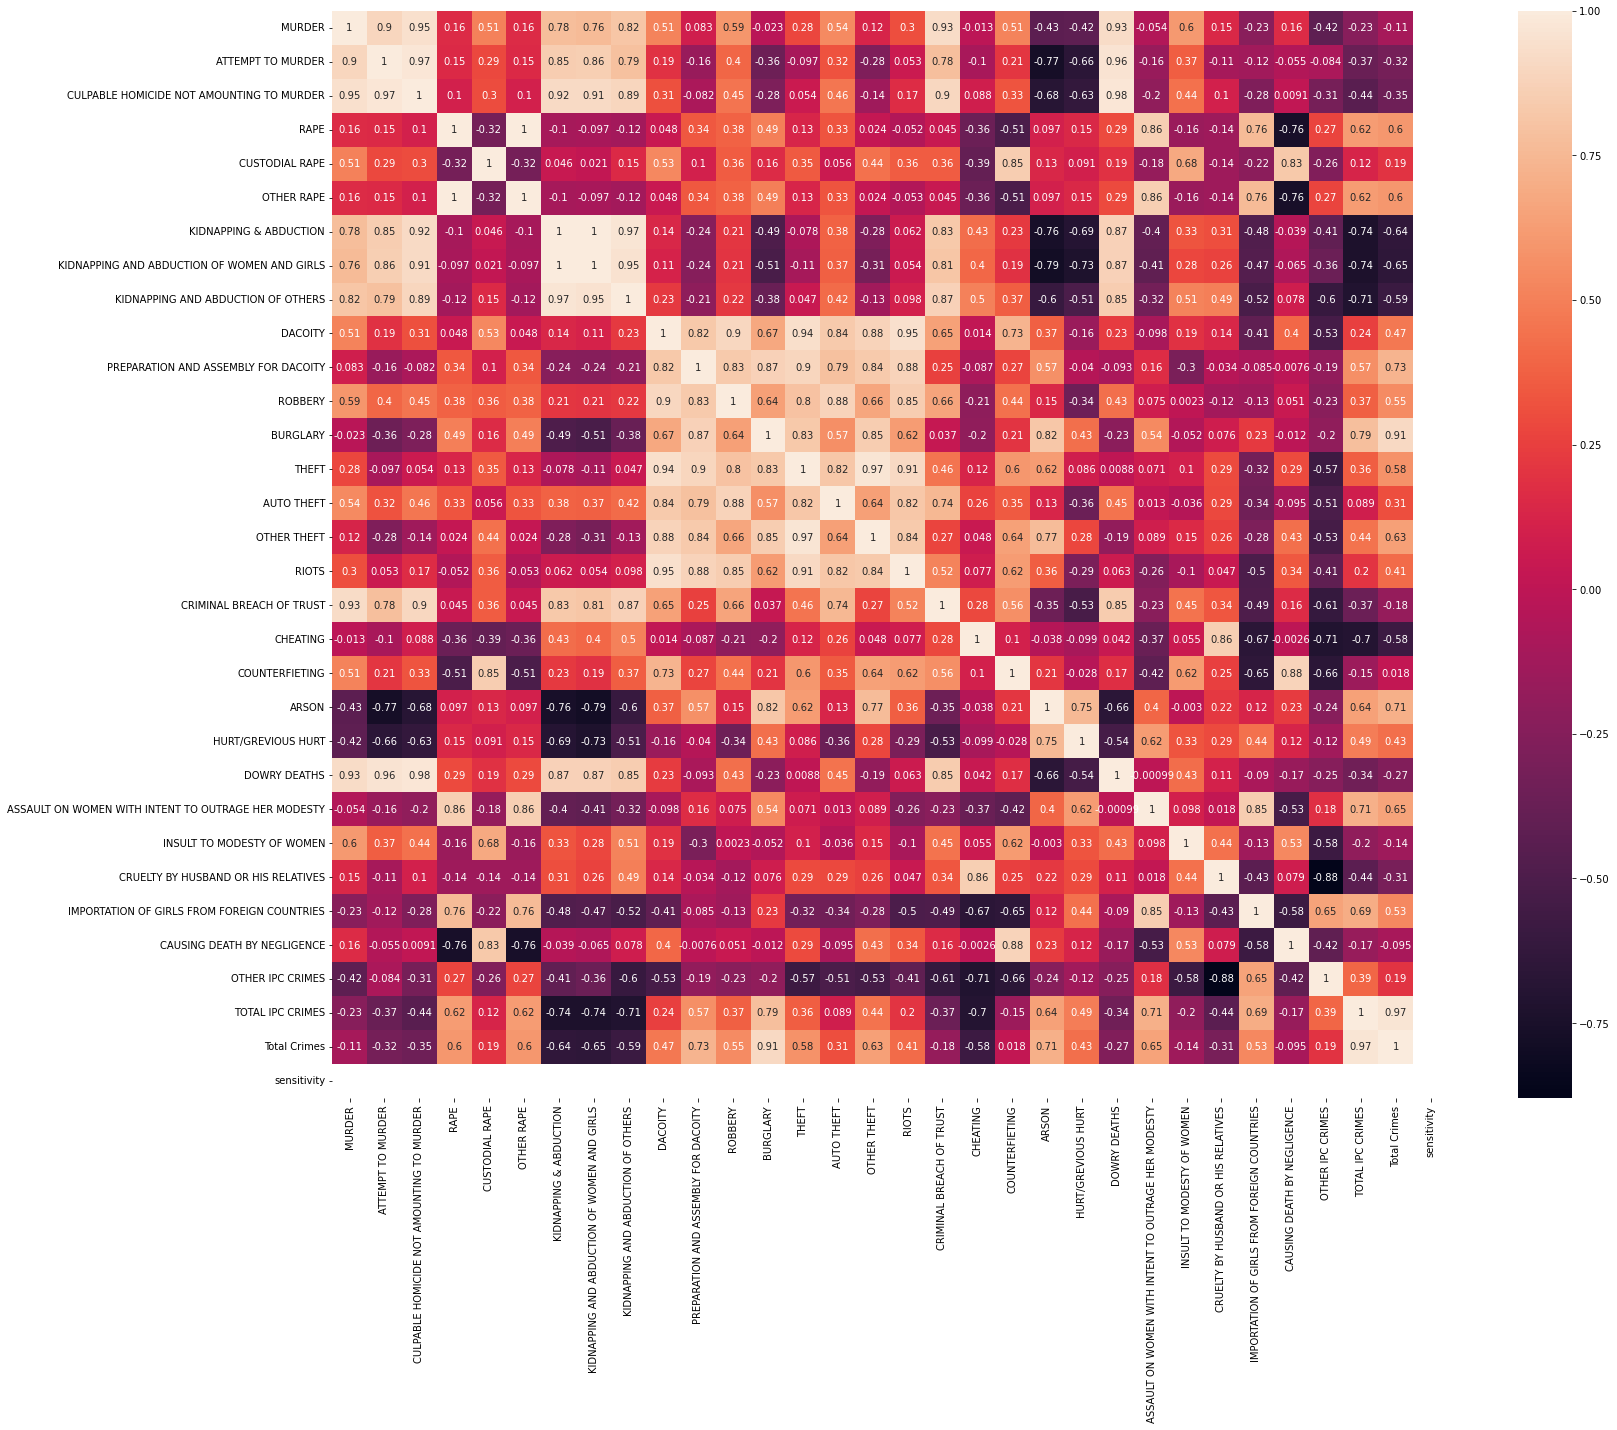

In [69]:
plt.figure(figsize=(25,20))
sns.heatmap(Sensitive_Areas.corr(),annot=True)

In [65]:
Sensitive_Areas['STATE/UT'].value_counts

<bound method IndexOpsMixin.value_counts of 1     ANDHRA PRADESH
19    MADHYA PRADESH
20       MAHARASHTRA
28         RAJASTHAN
30        TAMIL NADU
32     UTTAR PRADESH
Name: STATE/UT, dtype: object>

5 States have been placed under the sensitive areas category (MADHYA PRADESH, MAHARASHTRA, RAJASTHAN, TAMIL NADU, UTTAR PRADESH). One thing to observe is that all the states are one of the biggest states of India(Area wise). They are also highly populated. Columns like 'PREPARATION AND ASSEMBLY FOR DACOITY', 'BURGLARY', 'ARSON', 'CAUSING DEATH BY NEGLIGENCE' playes major role in impacting ther sensitivity of the areas.

There can be many factors that impacting more crimes e.g:- drug abuse, gang culture, less defence force from the government, low literacy rate, discrimination, human trafficing, poor infrastructure etc. High rape cases may be occuring due to gender inequality. The 'TOTAL IPC CRIMES' is highly correlated with the sensitivity of the area.

2. States in sensitive, moderate and peaceful areas.

In [70]:
Sensitive_Areas['STATE/UT'].value_counts

<bound method IndexOpsMixin.value_counts of 1     ANDHRA PRADESH
19    MADHYA PRADESH
20       MAHARASHTRA
28         RAJASTHAN
30        TAMIL NADU
32     UTTAR PRADESH
Name: STATE/UT, dtype: object>

In [71]:
Moderate_Areas['STATE/UT'].value_counts

<bound method IndexOpsMixin.value_counts of 4           BIHAR
11        GUJARAT
16      KARNATAKA
17         KERALA
34    WEST BENGAL
Name: STATE/UT, dtype: object>

In [73]:
Peaceful_Areas['STATE/UT'].value_counts

<bound method IndexOpsMixin.value_counts of 0         A & N ISLANDS
2     ARUNACHAL PRADESH
3                 ASSAM
5            CHANDIGARH
6          CHHATTISGARH
7          D & N HAVELI
8           DAMAN & DIU
9              DELHI UT
10                  GOA
12              HARYANA
13     HIMACHAL PRADESH
14      JAMMU & KASHMIR
15            JHARKHAND
18          LAKSHADWEEP
21              MANIPUR
22            MEGHALAYA
23              MIZORAM
24             NAGALAND
25               ODISHA
26           PUDUCHERRY
27               PUNJAB
29               SIKKIM
31              TRIPURA
33          UTTARAKHAND
Name: STATE/UT, dtype: object>

3. most safe and unsafe states.

By analysing the above data, we can observe make a conclusion that most unsafe and safe states are:-

UNSAFE-  MADHYAPRADESH being the most unafe state with total of 2413770 IPC crimes and 5139445 total crimes.

SAFE-  LAKSHADWEEP is the safest state of india with 743 IPC crimes and 1607 Total crimes only.

4. What could be done to reduce crime.

Literacy rate plays a major role in reducing the crime rate of any state/ country. 

Awareness of the civil rights is very important. By knowing your rights you can stop someone from doing wrong to you.

Strong Government bodies who can take actions and control the situations from going bad is important.

Gender inequality playes a major role in a state/s rape cases. The Government should make proper bills, schemes to deal with it and the citizens needs to be educated about that as well.

The governemtn should introduce verious bills to help the citizens for their better lifestyle.

UNemployement also playes a part in this which needs to dealt with.

# 4.4   Capstone project overall story in your own words. Min 1000 words.



We were given a capstone project which is - Crimes in India. In which we had to analyse the crimes of states/UT and districts of India. The data on which we were told to work was from 2001 to 2012. We were provided with 11 files from the Datatrained academy and their names were:-
1 01_District_wise_crimes_committed_IPC_2001_2012

2 02_01_District_wise_crimes_committed_against_SC_2001_2012

3 02_District_wise_crimes_committed_against_ST_2001_2012

4 03_District_wise_crimes_committed_against_children_2001_2012

5 08_01_Juvenile_apprehended_state_IPC_2001_2010

6 11_Property_stolen_and_recovered_nature_of_property_2001_2010

7 13_Police_killed_or_injured_on_duty2001_2010

8 17_Case_reported_and_value_of_property_taken_away_by_place_of_occurrence_2001_2012

9 17_Crime_by_place_of_occurrence_2001_2012

10 35_Human_rights_violation_by_police_2001_2010

11 42_District_wise_crimes_committed_against_women_2001_2012

These data were not enough so we were told to fetch more data from the internet, be it manually or by doing webscrapping. The project was divided into 4 phases.

-PHASE 1 was to collect the darta and Create a new file and keep the above-collected data. The Data which we needed to collect was:-

1 The population of each state.

2 Literacy Rate in each state

3 Area of each state.

-In PHASE 2 we were told to analyse the data STATE/UT wise. Verious analysis like 'Analysis of Literacy Rate vs Total Crimes', 'Analysis of the type of crime vs each state vs Literacy rate', 'Analysis of year-on-year total crime rate', 'Analysis of area vs overall crime', 'Analysis of Population vs overall Crime' were done on the data that was collectwed from varous sources. In the end of the PHASE 2, we analyse each state and made a crime report for the same.

-PHASE 3 was for the SQL operations. SQL queries were written for the given tasks. In this PHASE, the operations were done on the  11 files that were provided by the Datatrained Academy. The major task in this PHASE was to insert data into a table and then extracting the as per the requirements. We stored sonme data in DataFrame and also did some visualisation in the end.

-PHASE4 was about about clustering. In this PHASE unsupervised machine learning was done. We categorised the data into peaceful,moderate and sensitive area as per their crimes. First we merge the data according to the states, then We used KMeans algorithm and got three parts:-  0(moderate), 1(peaceful), 2(sensitive). Peaceful areas were the ones where total crimes were lowest. Moderate areas had average total cimes. Sensitive area were the most unsafe areas with very high total crimes. After dividing the data into 3 parts, we created dataframe for each cluster. We analysed that MADHYAPRADESH was the most unsafe state and LAKSHADWEEP was the safest state accorind to their total crimes.